In [1]:
java_code_smells = read.csv("java_code_smells.csv", header = TRUE)
kotlin_code_smells = read.csv("kotlin_code_smells.csv", header = TRUE)

In [2]:
set.seed(37)
df_java_projects_ran <- java_code_smells[sample(nrow(java_code_smells)),]
df_kotlin_projects_ran <- kotlin_code_smells[sample(nrow(kotlin_code_smells)),]

Dividing into training and test data.

In [3]:
df_java_projects_training <- df_java_projects_ran[1:400,]
df_kotlin_projects_training <- df_kotlin_projects_ran[1:400,]

In [4]:
rownames(df_java_projects_training) <- NULL
rownames(df_kotlin_projects_training) <- NULL

In [5]:
df_java_projects_training

Project,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
changmingxie/tcc-transaction,3,102,15,120,1086,159,7259,173,8,2775
Tencent/VasSonic,1,67,16,84,481,2,9987,365,19,8824
kbastani/spring-cloud-microservice-example,0,0,1,1,1285,21,1229,51,9,2504
siacs/Conversations,7,390,92,489,1766,331,54505,5483,140,3069
siyamed/android-shape-imageview,0,51,3,54,1547,52,2795,82,5,2286
android-cjj/Android-MaterialRefreshLayout,0,19,9,28,1173,75,3342,90,7,2079
rubensousa/RecyclerViewSnap,0,10,1,11,816,2,873,87,4,3788
checkstyle/checkstyle,618,542,381,1541,1912,486,239801,9961,232,4037
springside/springside4,0,92,47,139,2467,71,17902,1076,29,5479
dbeaver/dbeaver,81,3114,334,3529,1131,755,368544,10821,86,6674


In [6]:
library(devtools)
library(easyGgplot2)

Loading required package: ggplot2


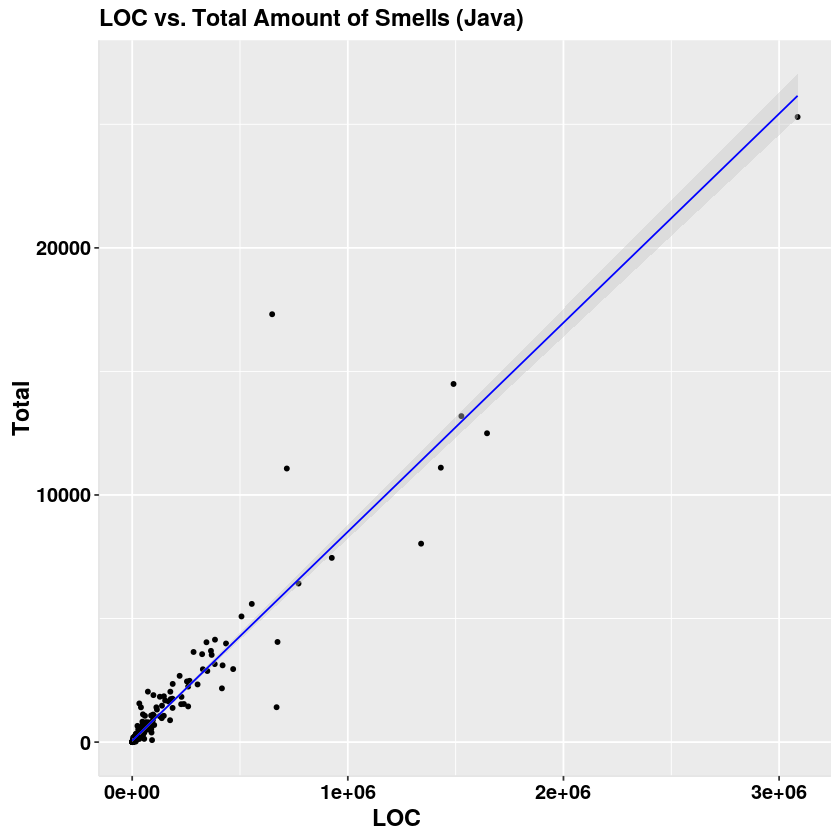

In [7]:
ggplot2.scatterplot(data=df_java_projects_training, xName='LOC',yName='Total',
            addRegLine=TRUE, regLineColor="blue",
            addConfidenceInterval=TRUE) + ggtitle("LOC vs. Total Amount of Smells (Java)")

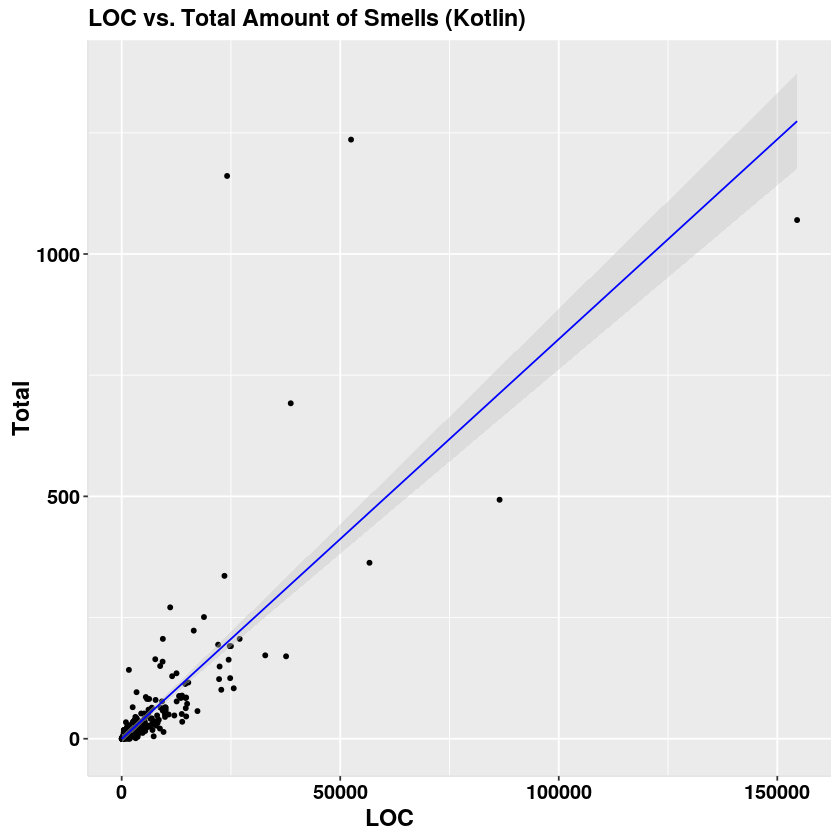

In [8]:
ggplot2.scatterplot(data=df_kotlin_projects_training, xName='LOC',yName='Total',
            addRegLine=TRUE, regLineColor="blue",
            addConfidenceInterval=TRUE) + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")

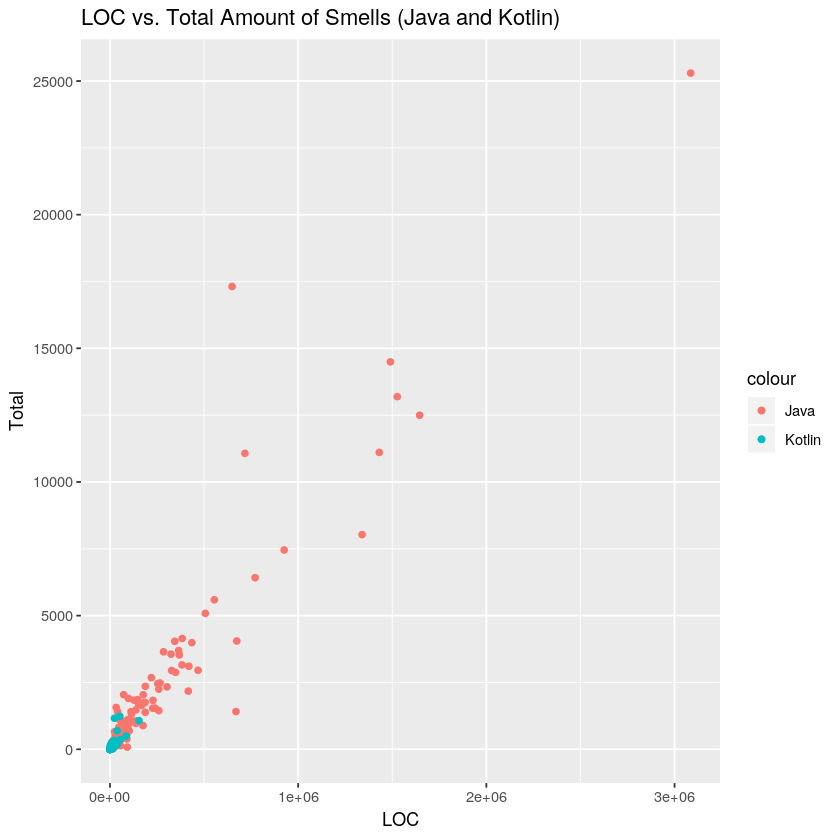

In [9]:
LOC <- df_java_projects_training$LOC
Total <- df_java_projects_training$Total

ggplot() +
  geom_point(data=df_java_projects_training, aes(LOC, Total, color= 'Java')) +
  geom_point(data=df_kotlin_projects_training, aes(df_kotlin_projects_training$LOC, df_kotlin_projects_training$Total, color= 'Kotlin')) + ggtitle("LOC vs. Total Amount of Smells (Java and Kotlin)")

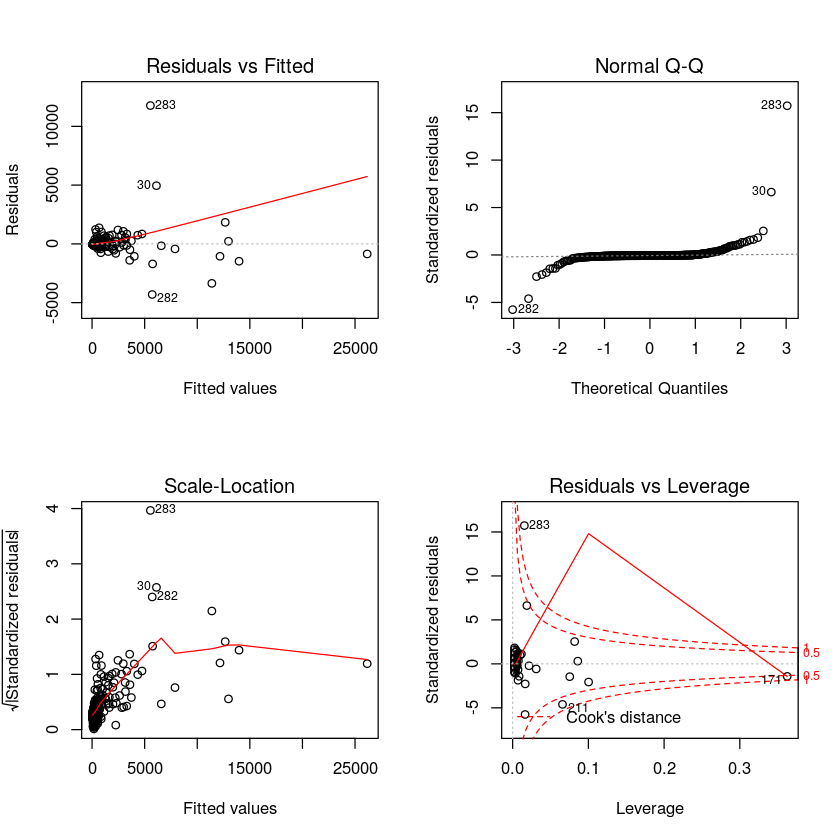

In [10]:
fit <- lm(Total ~ LOC, data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

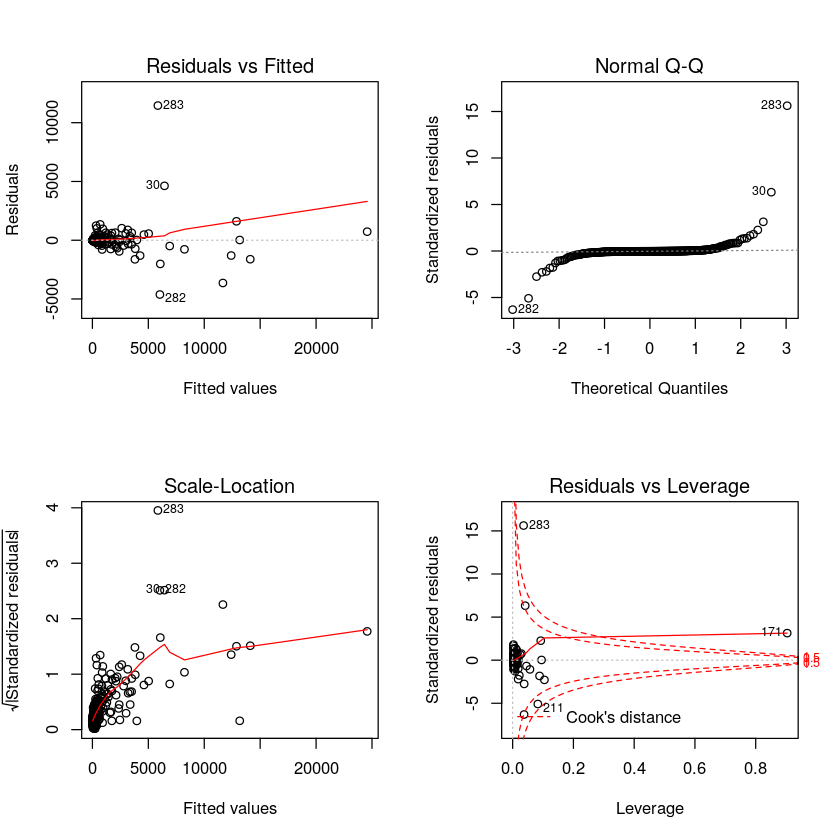

In [11]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(polynomial_fit)

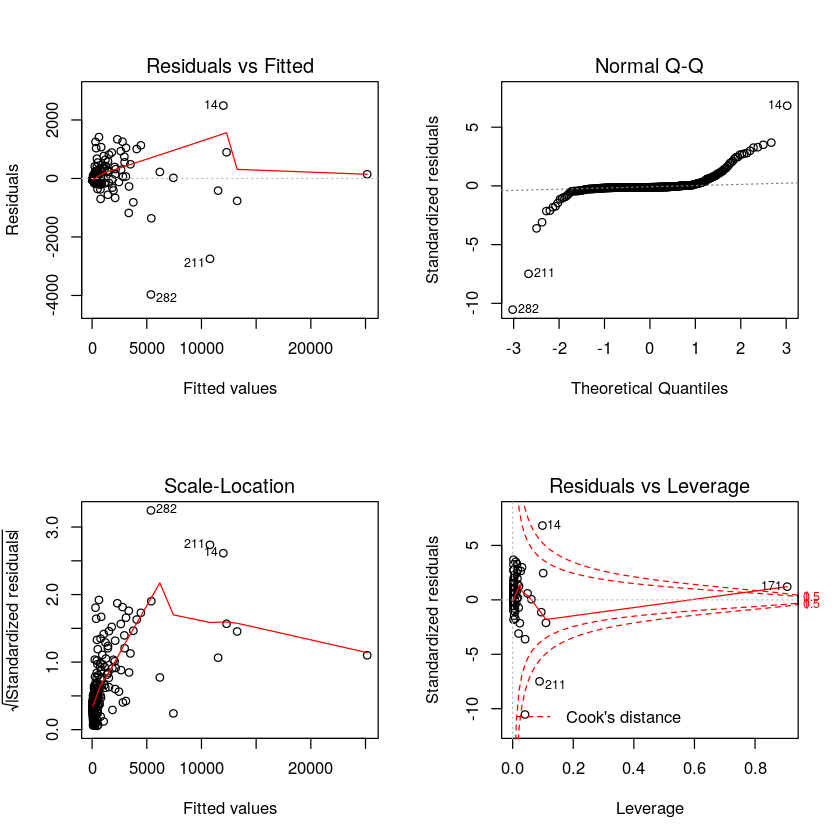

In [12]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=df_java_projects_training[-c(283,30),])
par(mfrow=c(2,2))
plot(polynomial_fit)

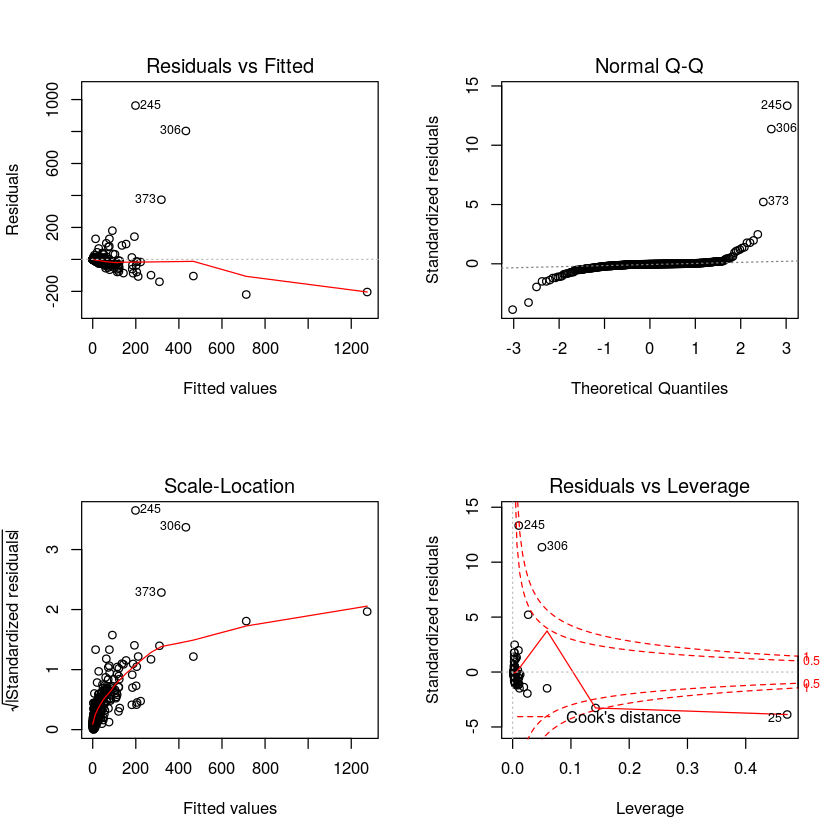

In [13]:
fit <- lm(Total ~ LOC, data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

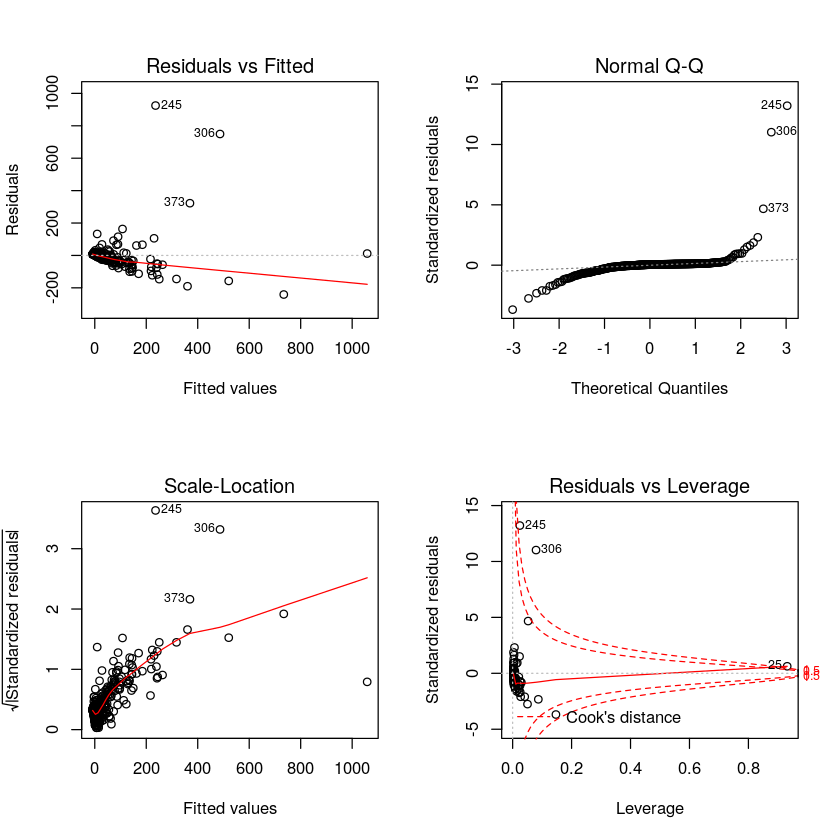

In [14]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(polynomial_fit)

# Box Cox Transformation

In [15]:
library('MASS')

In [16]:
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Total != 0, ]
df_kotlin_projects_training <- df_kotlin_projects_training[df_kotlin_projects_training$Total != 0, ]

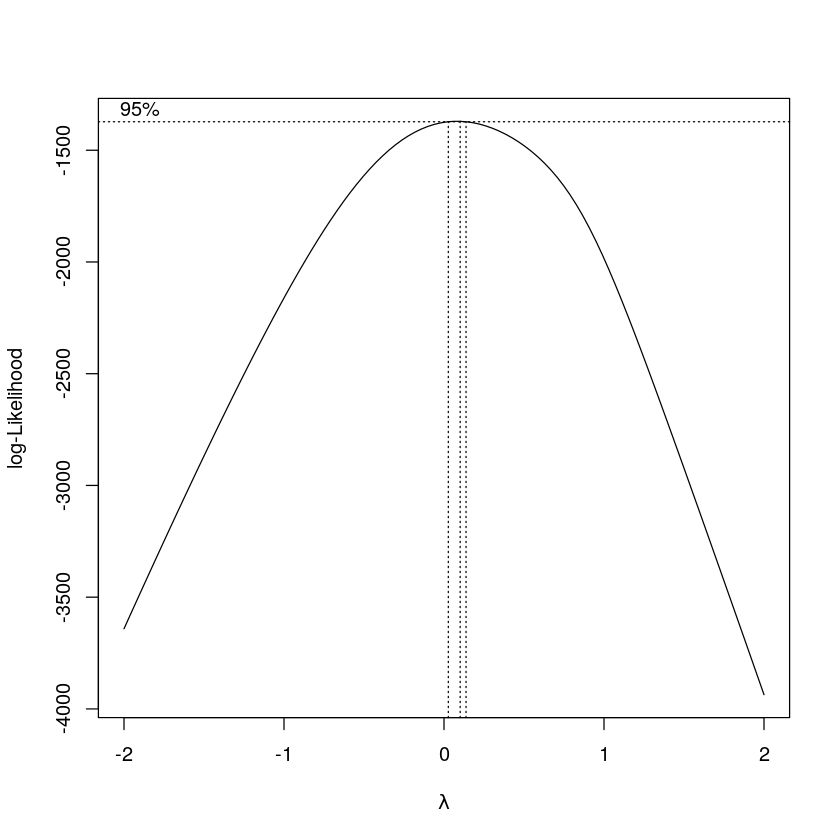

In [17]:
b_java=boxcox(Total ~ LOC, data=df_java_projects_training)

In [18]:
lambda=b_java$x
lik=b_java$y
bc=cbind(lambda,lik)
bc[order(-lik),]

lambda,lik
0.10101010,-1370.788
0.06060606,-1370.831
0.14141414,-1372.900
0.02020202,-1373.085
0.18181818,-1377.111
-0.02020202,-1377.605
0.22222222,-1383.365
-0.06060606,-1384.440
0.26262626,-1391.615
-0.10101010,-1393.629


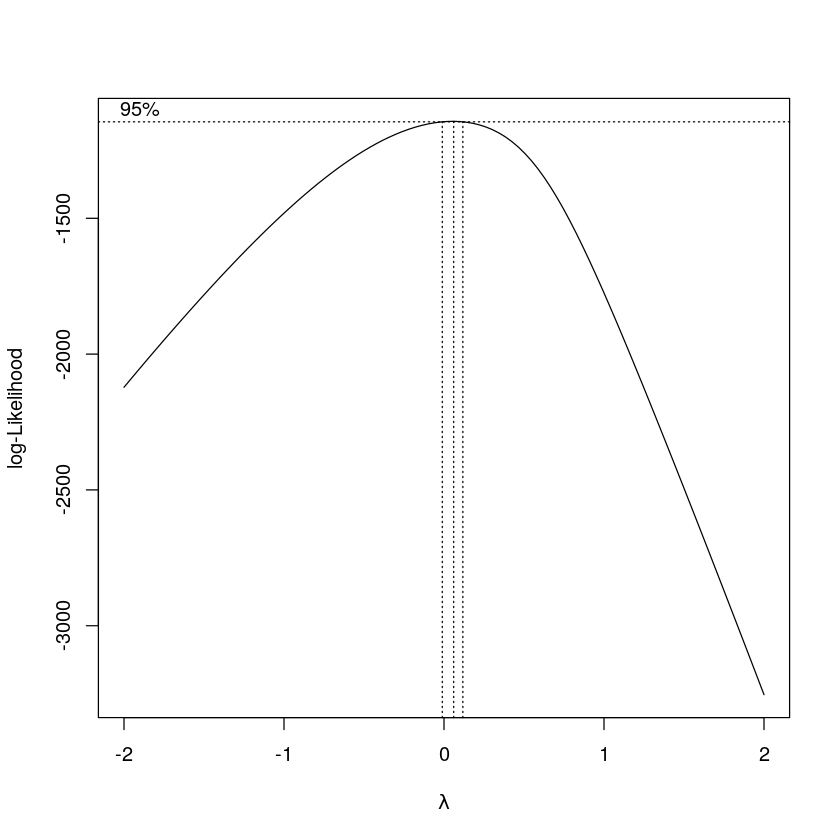

In [19]:
b_kotlin=boxcox(Total ~ LOC, data=df_kotlin_projects_training)

In [20]:
lambda=b_kotlin$x
lik=b_kotlin$y
bc=cbind(lambda,lik)
bc[order(-lik),]

lambda,lik
0.06060606,-1143.022
0.02020202,-1143.530
0.10101010,-1143.934
-0.02020202,-1145.377
0.14141414,-1146.356
-0.06060606,-1148.491
0.18181818,-1150.409
-0.10101010,-1152.816
0.22222222,-1156.220
-0.14141414,-1158.299


In [21]:
df_java_projects_training$Total <- log(df_java_projects_training$Total)
df_kotlin_projects_training$Total <- log(df_kotlin_projects_training$Total)

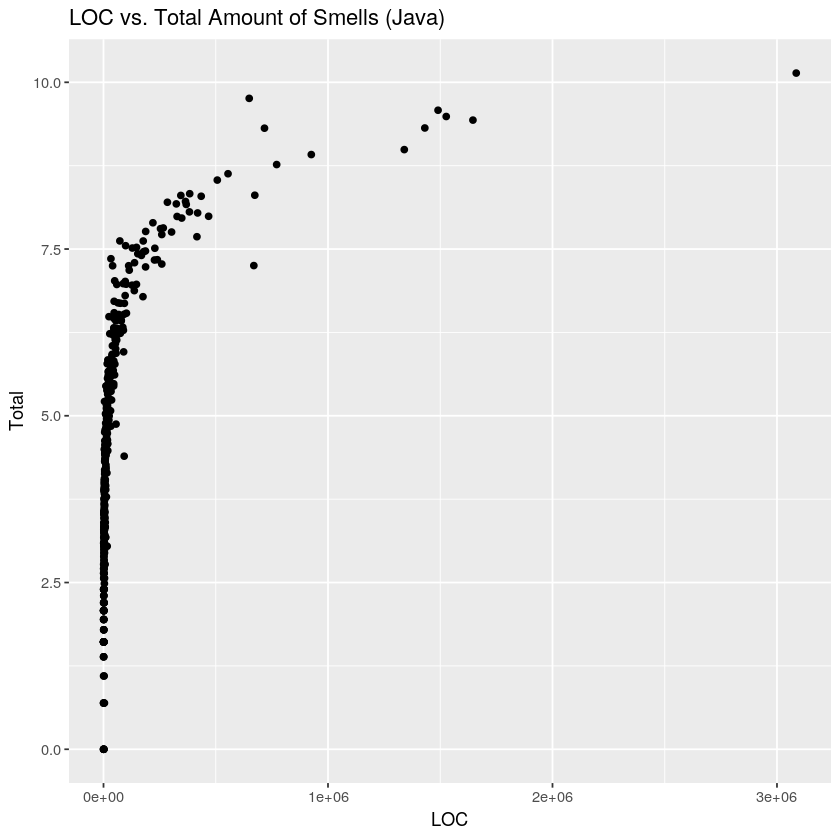

In [22]:
require(methods)
p <- ggplot(df_java_projects_training, aes(x = LOC, y = Total)) + geom_point()  + ggtitle("LOC vs. Total Amount of Smells (Java)")
print(p)

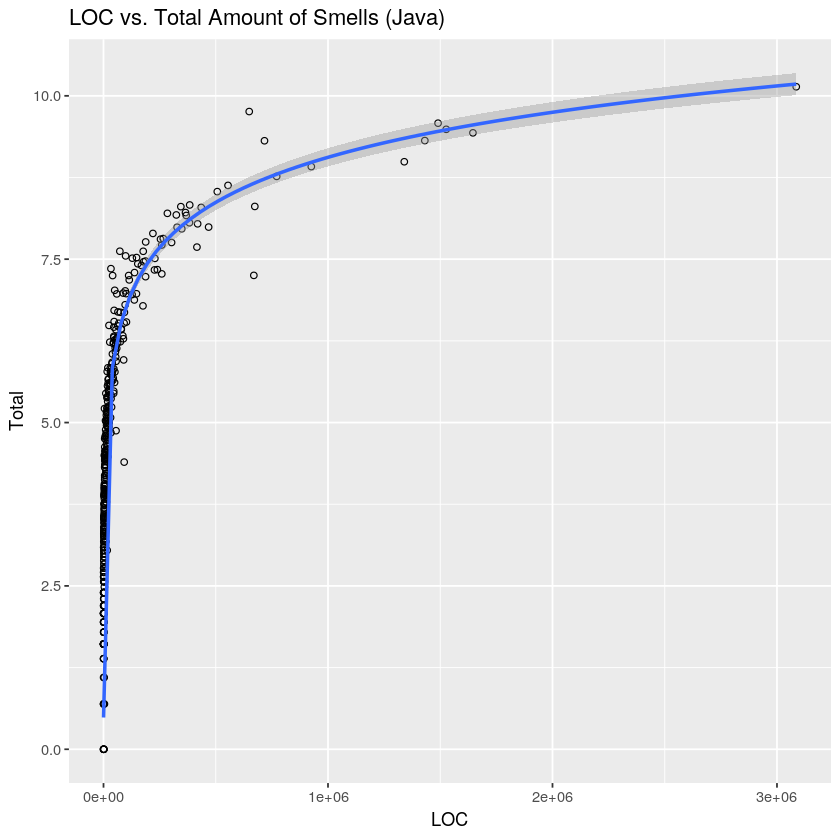

In [23]:
ggplot(df_java_projects_training, aes(LOC, Total))+
  geom_point(shape = 1) + stat_smooth(method = "lm", formula = y ~ log(x))  + ggtitle("LOC vs. Total Amount of Smells (Java)")

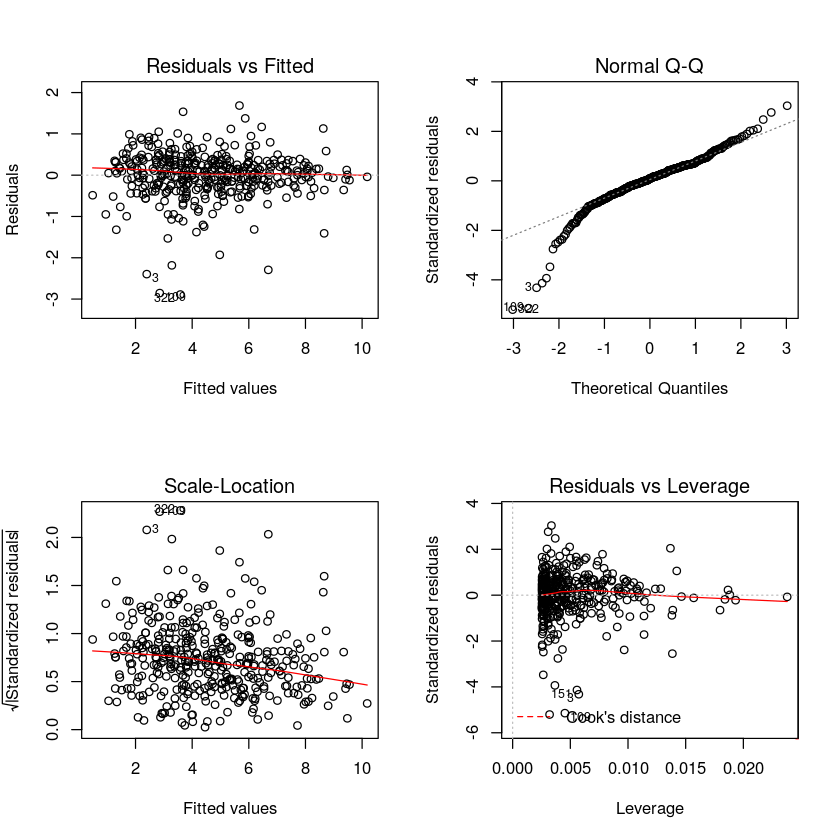

In [24]:
fit <- lm(Total ~ log(LOC), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [25]:
rownames(df_java_projects_training) <- NULL

In [26]:
df_java_projects_training <- df_java_projects_training[-c(3, 322, 148, 106, 317, 86, 247),]

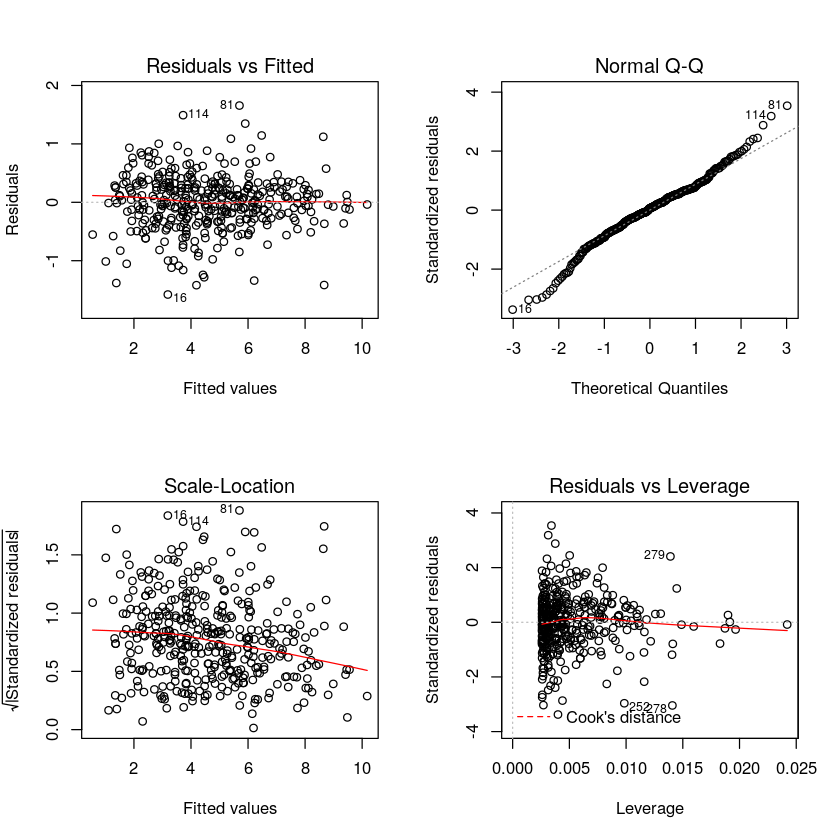

In [27]:
fit <- lm(Total ~ log(LOC), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

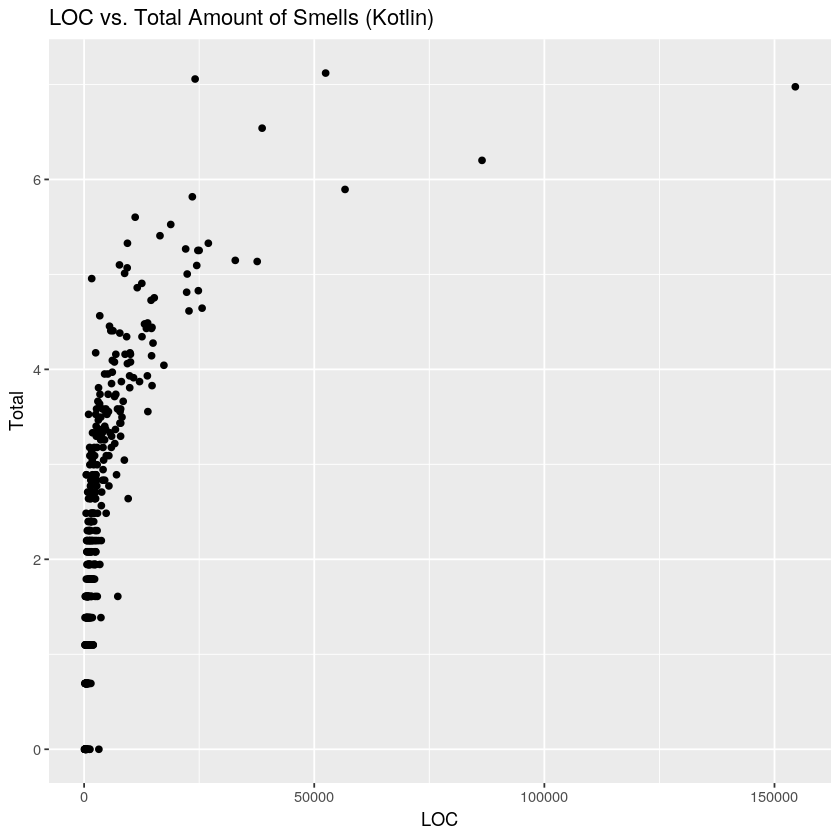

In [28]:
require(methods)
p <- ggplot(df_kotlin_projects_training, aes(x = LOC, y = Total)) + geom_point()  + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")
print(p)

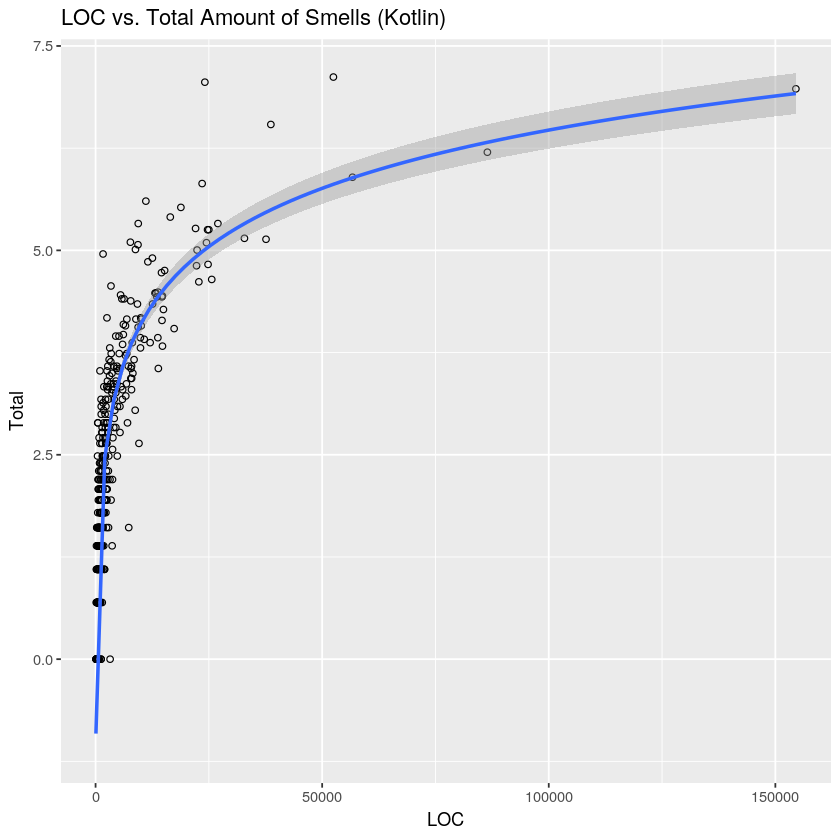

In [29]:
ggplot(df_kotlin_projects_training, aes(LOC, Total))+
  geom_point(shape = 1) + stat_smooth(method = "lm", formula = y ~ log(x))  + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")

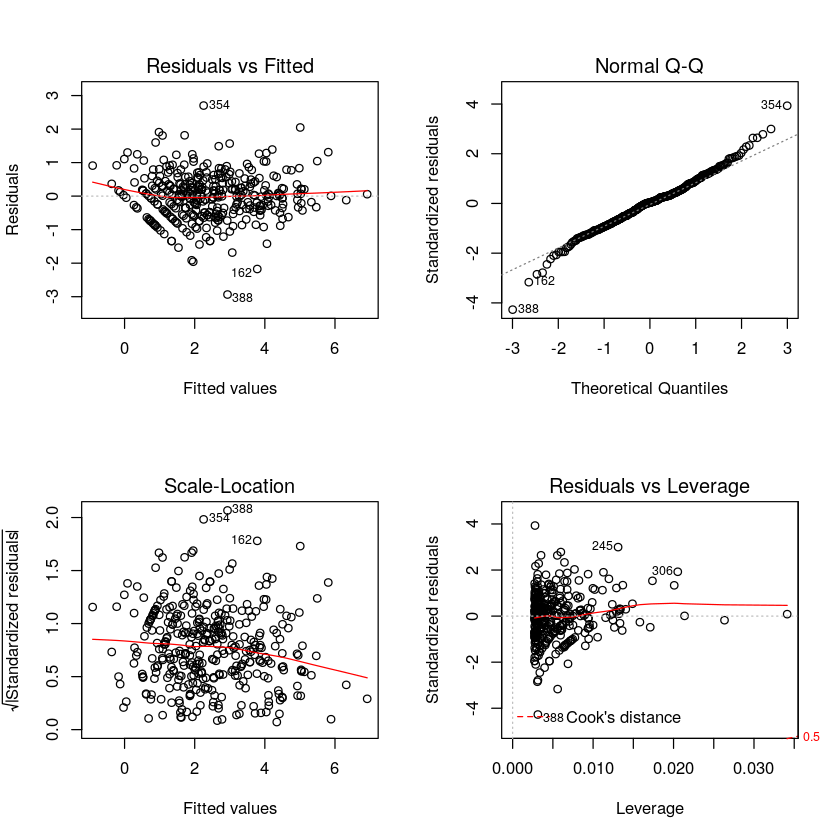

In [30]:
fit <- lm(Total ~ log(LOC), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [31]:
rownames(df_kotlin_projects_training) <- NULL

In [32]:
df_kotlin_projects_training <- df_kotlin_projects_training[-c(388, 354, 326, 356),]

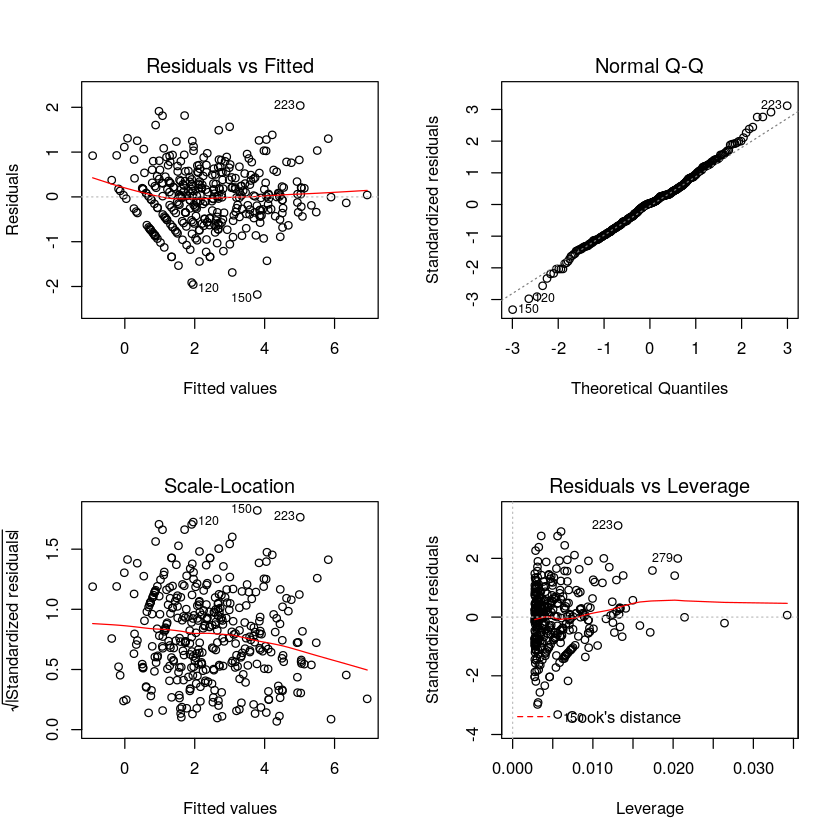

In [33]:
fit <- lm(Total ~ log(LOC), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

# ANCOVA Analysis

In [34]:
df_java_projects_training["Language"] <- 1
df_kotlin_projects_training["Language"] <- 0
java_kotlin_df = data.frame(rbind(cbind(df_java_projects_training$Language, df_java_projects_training$Total, df_java_projects_training$LOC),cbind(df_kotlin_projects_training$Language, df_kotlin_projects_training$Total, df_kotlin_projects_training$LOC)))
java_kotlin_df <- setNames(java_kotlin_df, c("Language","Total","LOC"))
new <- java_kotlin_df$Language*java_kotlin_df$LOC
java_kotlin_df$Language <- factor(java_kotlin_df$Language, label = c("Kotlin", "Java"))

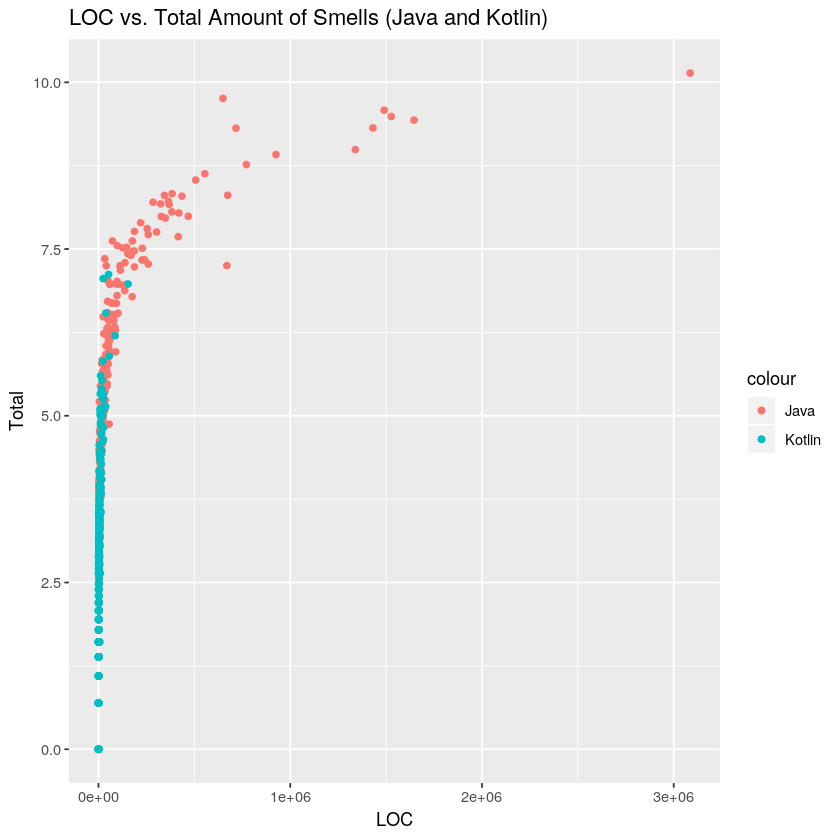

In [35]:
LOC <- df_java_projects_training$LOC
Total <- df_java_projects_training$Total

ggplot() +
  geom_point(data=df_java_projects_training, aes(LOC, Total, color= 'Java')) +
  geom_point(data=df_kotlin_projects_training, aes(df_kotlin_projects_training$LOC, df_kotlin_projects_training$Total, color= 'Kotlin')) + ggtitle("LOC vs. Total Amount of Smells (Java and Kotlin)")

In [36]:
java_kotlin_total <- java_kotlin_df$Total
java_kotlin_language <- java_kotlin_df$Language
java_kotlin_loc <- java_kotlin_df$LOC

aggregate(java_kotlin_total, by=list(java_kotlin_language), FUN=mean)

Group.1,x
Kotlin,2.431494
Java,4.608095


In [37]:
res1 <- aov(java_kotlin_df$Total ~ java_kotlin_df$Language + new)
summary(res1)

                         Df Sum Sq Mean Sq F value Pr(>F)    
java_kotlin_df$Language   1  886.3   886.3   361.5 <2e-16 ***
new                       1  491.0   491.0   200.3 <2e-16 ***
Residuals               746 1828.9     2.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [38]:
res1 <- aov(java_kotlin_total ~ java_kotlin_language + java_kotlin_loc + java_kotlin_language:java_kotlin_loc,data = java_kotlin_df)
summary(res1)

                                      Df Sum Sq Mean Sq F value Pr(>F)    
java_kotlin_language                   1  886.3   886.3   430.5 <2e-16 ***
java_kotlin_loc                        1  523.7   523.7   254.4 <2e-16 ***
java_kotlin_language:java_kotlin_loc   1  262.4   262.4   127.4 <2e-16 ***
Residuals                            745 1533.9     2.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [40]:
t.test(java_kotlin_total ~ java_kotlin_language, data = java_kotlin_df)


	Welch Two Sample t-test

data:  java_kotlin_total by java_kotlin_language
t = -17.04, df = 711.76, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.427382 -1.925820
sample estimates:
mean in group Kotlin   mean in group Java 
            2.431494             4.608095 


In [41]:
library(car)
leveneTest(java_kotlin_total ~ java_kotlin_language, center = mean, data = java_kotlin_df)

Loading required package: carData


,Df,F value,Pr(>F)
group,1,31.98698,2.210583e-08
,747,NA,NA


In [42]:
result_of_ancova <- aov(java_kotlin_total ~ java_kotlin_loc + java_kotlin_language, data = java_kotlin_df)
summary(result_of_ancova)

                      Df Sum Sq Mean Sq F value Pr(>F)    
java_kotlin_loc        1  806.4   806.4   334.9 <2e-16 ***
java_kotlin_language   1  603.5   603.5   250.7 <2e-16 ***
Residuals            746 1796.2     2.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [43]:
residuals <- resid(result_of_ancova)
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.98601, p-value = 1.406e-06


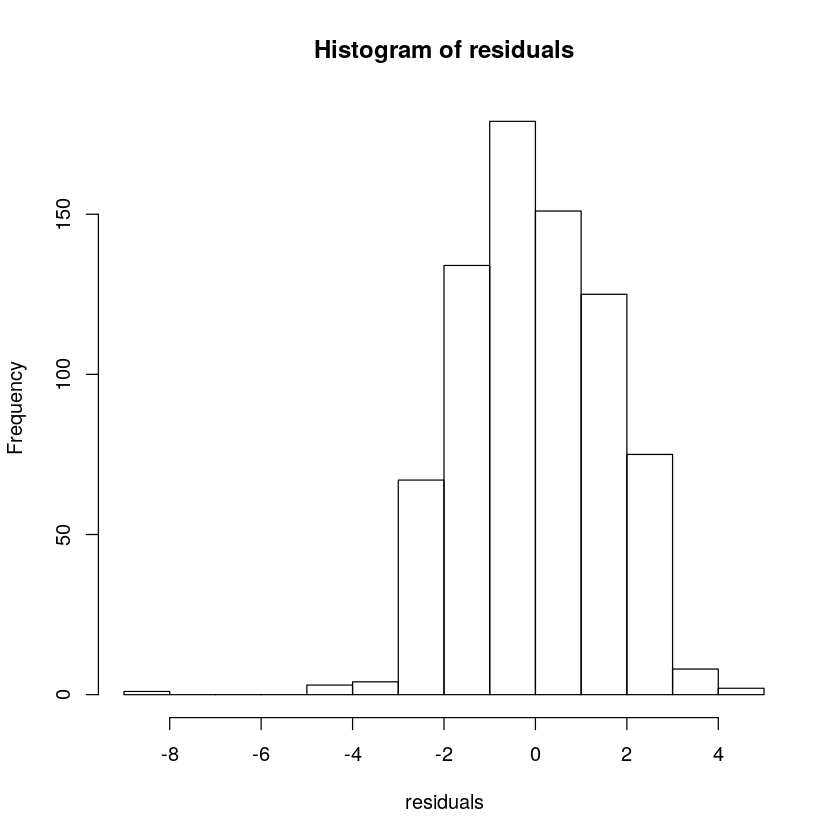

In [44]:
hist(residuals)

In [45]:
library(effects)

lattice theme set by effectsTheme()
See ?effectsTheme for details.


In [46]:
effect("java_kotlin_language", result_of_ancova)


 java_kotlin_language effect
java_kotlin_language
  Kotlin     Java 
2.608305 4.441819 

# Correlation Matrices

In [ ]:
java_projects_training_w_projects <- subset(df_java_projects_training, select = c(2,3,4,5,6,7,8,9,10,11))
res <- cor(java_projects_training_w_projects)
round(res, 2)

In [ ]:
kotlin_projects_training_w_projects <- subset(df_kotlin_projects_training, select = c(2,3,4,5,6,7,8,9,10,11))
res <- cor(kotlin_projects_training_w_projects)
round(res, 2)

# Evaluation

In [ ]:
RMSE = function(res){
  sqrt(mean((res)^2))
}

## Evaluation Java

In [ ]:
rownames(df_java_projects_ran) <- NULL
java_projects_test_data <-  df_java_projects_ran[401:NROW(df_java_projects_ran),]

In [ ]:
java_projects_test_data$Total <- log(java_projects_test_data$Total)
java_projects_test_data <- java_projects_test_data[java_projects_test_data$Total != 0, ]
java_projects_test_data <- java_projects_test_data[Reduce(`&`, lapply(java_projects_test_data, function(x) !is.na(x)  & is.finite(x))),]

In [ ]:
head(java_projects_test_data)

In [ ]:
summary(java_projects_test_data)

In [ ]:
fit <- lm(java_projects_test_data$Total ~ log(java_projects_test_data$LOC))

In [ ]:
residuals <- residuals(fit)

In [ ]:
RMSE(residuals)

In [ ]:
ggplot(df_java_projects_ran, aes(LOC, log(Total)))+
  stat_smooth(method = "lm", formula = y ~ log(x)) +
  geom_point(data=df_java_projects_training, aes(df_java_projects_training$LOC, df_java_projects_training$Total, color= 'Training Data')) +
  geom_point(data=java_projects_test_data, aes(java_projects_test_data$LOC, java_projects_test_data$Total, color= 'Test Data')) +
  ggtitle("LOC vs. Total Amount of Smells (Java)")